In [1]:
import pygame
import tensorflow as tf
import numpy as np
import cv2
from Latex.Latex import Latex
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.backends.backend_agg as agg
import pylab

pygame 2.1.0 (SDL 2.0.16, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
black = [0, 0, 0]
white = [255, 255, 255]
red = [255, 0, 0]
green = [0, 255, 0]
draw_on = False
last_pos = (0, 0)
color = (255, 128, 0)
radius = 4
font_size = 50

In [3]:
width = 1440
height = 400

In [4]:
mean_train = np.load("train_images_mean.npy")
std_train = np.load("train_images_std.npy")

In [5]:
tf.compat.v1.reset_default_graph()
model = Latex("model", mean_train, std_train, plotting=True, verbose=True)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


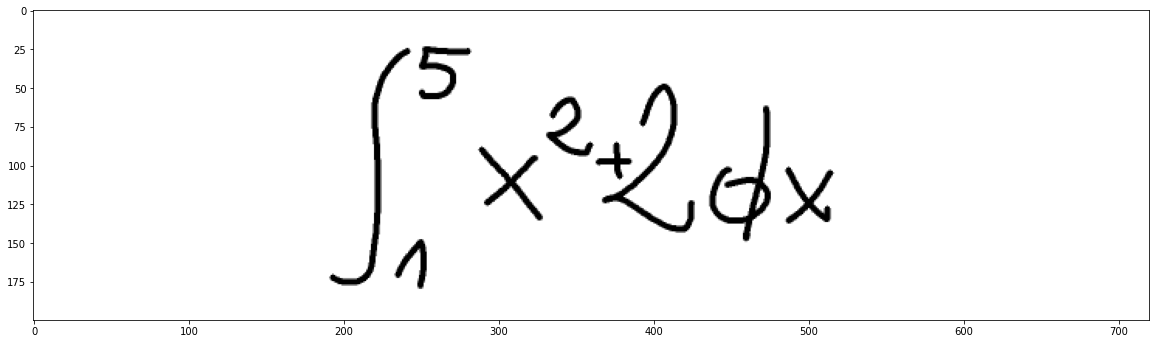

Start threshold: 


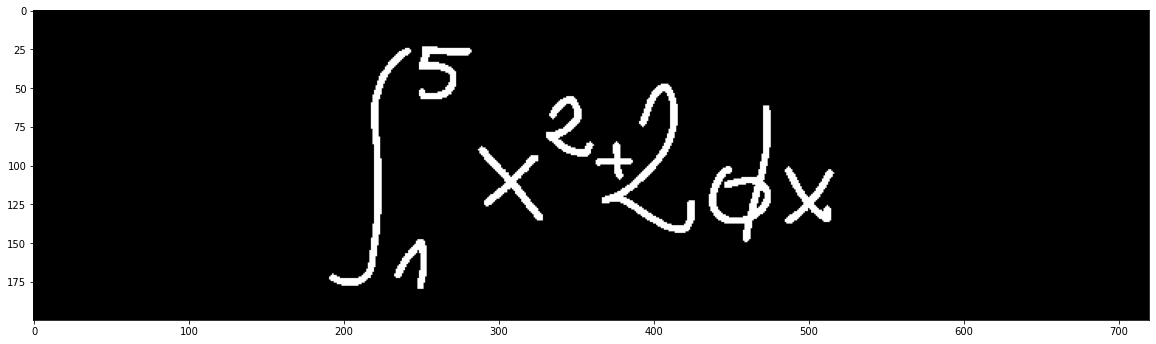

Start bounding boxes: 


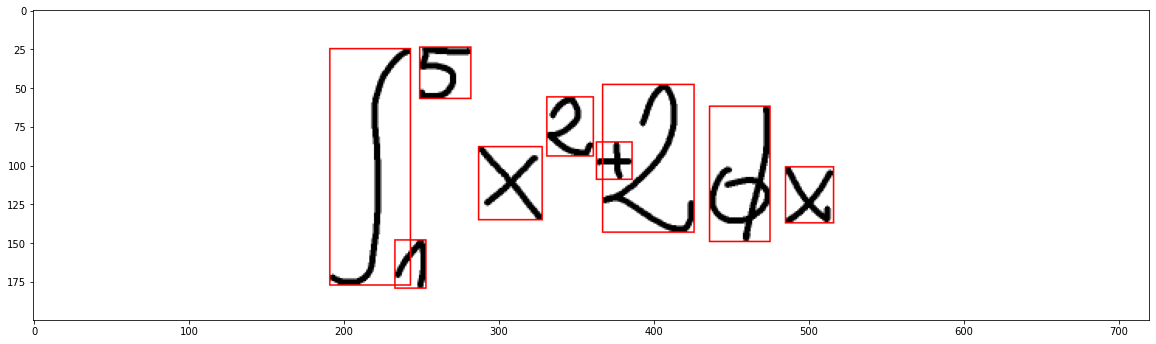



Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model\model.ckpt-40000


C:\Users\Grzegorz\Downloads\płytka-20221117T210854Z-001\płytka\program\Latex\Latex.py:126: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  conv1 = tf.compat.v1.layers.conv2d(
c:\users\grzegorz\appdata\local\programs\python\python38\lib\site-packages\keras\legacy_tf_layers\convolutional.py:563: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
C:\Users\Grzegorz\Downloads\płytka-20221117T210854Z-001\płytka\program\Latex\Latex.py:134: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a future version. Please use `tf.keras.layers.MaxPooling2D` instead.
  pool1 = tf.compat.v1.layers.max_pooling2d(
c:\users\grzegorz\appdata\local\programs\python\python38\lib\site-packages\keras\legacy_tf_layers\pooling.py:568: UserWarning: `layer.apply` is deprecated and will be removed in a fut

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Recognized a int with 99.84 % accuracy
Recognized a 1 with 100.00 % accuracy
Recognized a 5 with 100.00 % accuracy
Recognized a x with 100.00 % accuracy
Recognized a 2 with 100.00 % accuracy
Recognized a + with 100.00 % accuracy
Recognized a 2 with 100.00 % accuracy
Recognized a d with 100.00 % accuracy
Recognized a x with 100.00 % accuracy
latex:  int15x2+2dx


error: video system not initialized

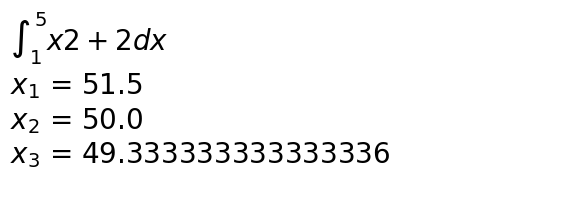

In [6]:
class Background(pygame.sprite.Sprite):
    def __init__(self, image_file, location):
        pygame.sprite.Sprite.__init__(self)  
        self.image = pygame.image.load(image_file)
        self.rect = self.image.get_rect()
        self.rect.left, self.rect.top = location

screen = pygame.display.set_mode((width, height*2))
screen.fill(white)
pygame.font.init()
pygame.init()

def crope(orginal):
    cropped = pygame.Surface((width, height))
    cropped.blit(orginal, (0, 0), (0, 0, width, height))
    return cropped


def roundline(srf, color, start, end, radius=1):
    dx = end[0] - start[0]
    dy = end[1] - start[1]
    distance = max(abs(dx), abs(dy))
    for i in range(distance):
        x = int(start[0] + float(i) / distance * dx)
        y = int(start[1] + float(i) / distance * dy)
        pygame.draw.circle(srf, color, (x, y), radius)


def draw_partition_line():
    pygame.draw.line(screen, black, [0, height+4], [width, height+4], 8)

font = pygame.font.SysFont('Arial',35)
text_1 = font.render('QUIT' , True , white)
text_2 = font.render('START' , True , white)
text_3 = font.render('RESET' , True , white)

b_width=140
b_height=40
button_1 = pygame.Rect(width/2-b_width/2, height+b_height/2-14, b_width, b_height)
button_2 = pygame.Rect(width/2+b_width*1.5, height+b_height/2-14, b_width, b_height)
button_3 = pygame.Rect(width/2-b_width*2.5, height+b_height/2-14, b_width, b_height)

try:
    while True:
        e = pygame.event.wait()
        draw_partition_line()
        
        pygame.draw.rect(screen, [0, 0, 0], button_1)
        pygame.draw.rect(screen, [0, 0, 0], button_2)
        pygame.draw.rect(screen, [0, 0, 0], button_3)
        screen.blit(text_1, (width/2-b_width*2.3, height+b_height/4-6))
        screen.blit(text_2, (width/2-b_width/2.5, height+b_height/4-6))
        screen.blit(text_3, (width/2+b_width*1.6, height+b_height/4-6))

        if(e.type == pygame.MOUSEBUTTONDOWN and e.button == 3):
            screen.fill(white)

        if e.type == pygame.QUIT:
            raise StopIteration

        if(e.type == pygame.MOUSEBUTTONDOWN and e.button == 1):
            if pygame.mouse.get_pos()[1]<height:
                color = black
                pygame.draw.circle(screen, color, e.pos, radius)
                draw_on = True
            elif pygame.mouse.get_pos()[1]<height+b_height:
                if width/2-b_width*2.5 < pygame.mouse.get_pos()[0] < width/2-b_width*1.5:
                    pygame.quit()   
                if width/2-b_width/2 < pygame.mouse.get_pos()[0] < width/2+b_width/2:
                    fname = "out.png"
                    img = crope(screen)
                    pygame.image.save(img, fname)
                    formula = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
                    resize = (720, 200)
                    formula = cv2.resize(formula, resize)
                    plt.figure(figsize=(20,10))
                    plt.imshow(formula, cmap="gray")
                    plt.show()
                    latex = model.predict(formula)
                    print("latex: ", latex['formula'])
                    if len(latex['formula'])>1:
                        if latex['formula'][0] == "i":
                            lwr = latex['formula'][3]
                            upr = latex['formula'][4]
                            rst = 5
                        else:
                            lwr = latex['formula'][1]
                            upr = latex['formula'][2]
                            rst = 3
                    else:
                        lwr = 0
                        upr = 0
                        rst = 0
                        
                    
                    digits = np.array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
                    eq = np.zeros((6,2))
                    sum_1 = sum_1_1 = sum_1_2 = sum_2 = sum_3 = 0
                    x_1_num =  x_1_pow = 0
                    x_1 = 0
                    x_1_sign = '+'
                    k = l = o = 0
                    
                    for i in range (rst, len(latex['formula'])):
                        if np.any(latex['formula'][i] == digits):
                            if o == 0:
                                x_1_num = str(x_1_num) + latex['formula'][i]
                            o = 0
                        elif np.any(latex['formula'][i] == '-'):
                            x_1_sign = '-'
                        elif np.any(latex['formula'][i] == 'x'):
                            if l == 0:
                                if np.any(latex['formula'][i+1] == digits) :
                                    x_1_pow = latex['formula'][i+1]
                                else:
                                    x_1_pow = 1
                            eq[k][0] = x_1_num
                            eq[k][1] = x_1_pow
                            x_1_num =  x_1_pow = 0
                            x_1_sign = '+'
                            k += 1
                            o = 1
                        elif np.any(latex['formula'][i] == 'd'):
                            eq[k][0] = x_1_num
                            eq[k][1] = x_1_pow
                            l = 1
                    
                    if np.any(str(upr) == digits) and np.any(str(lwr) == digits) and upr > lwr:
                        for j in range(6):
                            if eq[j][1] != 0 and eq[j][0]==0:
                                eq[j][0] = 1
                        sum_1_1 = 0
                        sum_2_2 = np.zeros((6,1))
                        sum_3_3 = 0
                        for i in range(int(lwr), int(upr)+1):
                            for j in range(6):
                                sum_2_2[i] = sum_2_2[i] + (eq[j][0] * (i**eq[j][1]))
                                sum_1_1 = sum_1_1 + (eq[j][0] * (i**eq[j][1]))
                                if i == int(upr)-1:
                                    sum_1_2 = sum_1_1
                        sum_1 = (sum_1_1 + sum_1_2)/2
                        sum_2 = (sum_2_2[int(lwr)]+sum_2_2[int(upr)])/2
                        
                        for i in range(int(lwr)+1, int(upr)):
                            sum_2 = sum_2 + sum_2_2[i]
                        
                        sum_3 = sum_2_2[int(lwr)]+sum_2_2[int(upr)]
                        
                        for i in range(int(lwr)+1, int(upr)):
                            if i%2 != 0:
                                sum_3 = sum_3 + sum_2_2[i]*2
                            else:
                                sum_3 = sum_3 + sum_2_2[i]*4
                        sum_3 = sum_3/3
                        
                        matplotlib.use("Agg")
                        fig = pylab.figure(figsize=[7.2, 2.2],dpi=100, )
                        ax = fig.gca()
                        a = "\int_{"+lwr+"}^{"+upr+"}"+latex['formula'][rst:]+"$"+"\n"+"$x_1$ = "+str(sum_1)+"\n"+"$x_2$ = "+str(sum_2[0])+"\n"+"$x_3$ = "+str(sum_3[0])
                        ax.axis('off')
                        ax.text(0,0.2,"$"+a+"",fontsize=20,color="black")
                    else:
                        matplotlib.use("Agg")
                        fig = pylab.figure(figsize=[7.2, 2.2],dpi=100, )
                        ax = fig.gca()
                        a = "ERROR"
                        ax.axis('off')
                        ax.text(0,0.2,"$"+a+"$",fontsize=20,color="black")
                   
                    
                    canvas = agg.FigureCanvasAgg(fig)
                    canvas.draw()
                    renderer = canvas.get_renderer()
                    raw_data = renderer.tostring_rgb()
                   
                    size = canvas.get_width_height()
                    surf = pygame.image.fromstring(raw_data, size, "RGB")
                    screen.blit(surf, (width/2-240,500))
                    pygame.display.flip()
    
                if width/2+b_width*1.5 < pygame.mouse.get_pos()[0] < width/2+b_width*2.5:
                    screen.fill(white)
                    
        if e.type == pygame.MOUSEBUTTONUP and e.button == 1:
            draw_on = False
        
        if e.type == pygame.MOUSEMOTION:
            if draw_on:
                pygame.draw.circle(screen, color, e.pos, radius)
                roundline(screen, color, e.pos, last_pos, radius)
            last_pos = e.pos

        pygame.display.flip()

except StopIteration:
    pass

pygame.quit()